<a href="https://colab.research.google.com/github/thesimaranjaira/AspectExtraction_SentimentAnalysis/blob/main/MLR_perhome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mplt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from sklearn.linear_model import LinearRegression


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/dataset/data_no1.csv')
#df = df.drop(['time', 'tempk', 'forecasttime'], axis=1)
print(df.head(10))
print(df.describe(include='all'))


             timestamp  consumption  ...  forecasttotalpulse  homesforecastedpulse
0  2018-08-13 01:00:00     1.167373  ...                 NaN                   NaN
1  2018-08-13 02:00:00     1.171019  ...                 NaN                   NaN
2  2018-08-13 03:00:00     1.102508  ...                 NaN                   NaN
3  2018-08-13 04:00:00     1.281203  ...                 NaN                   NaN
4  2018-08-13 05:00:00     1.562144  ...                 NaN                   NaN
5  2018-08-13 06:00:00     1.401059  ...                 NaN                   NaN
6  2018-08-13 07:00:00     1.229084  ...                 NaN                   NaN
7  2018-08-13 08:00:00     1.124097  ...                 NaN                   NaN
8  2018-08-13 09:00:00     1.095233  ...                 NaN                   NaN
9  2018-08-13 10:00:00     1.076520  ...                 NaN                   NaN

[10 rows x 22 columns]
                  timestamp  ...  homesforecastedpulse
count   

In [ ]:
ActualLoad = (pd.read_csv("/content/drive/My Drive/dataset/data_no1.csv", index_col=["timestamp"], parse_dates=True).iloc[:, 2]).rename("load")
ForecastedLoad= (pd.read_csv("/content/drive/My Drive/dataset/data_no1.csv", index_col=["timestamp"], parse_dates=True).iloc[:, 11])
tempC = (pd.read_csv("/content/drive/My Drive/dataset/data_no1.csv", index_col=["timestamp"], parse_dates=True).iloc[:, 4])



In [ ]:
print(ActualLoad, ForecastedLoad, tempC)

timestamp
2018-08-13 01:00:00      3190.430
2018-08-13 02:00:00      3200.395
2018-08-13 03:00:00      3013.154
2018-08-13 04:00:00      3501.527
2018-08-13 05:00:00      4269.340
                          ...    
2021-01-28 18:00:00    180122.345
2021-01-28 19:00:00    180508.608
2021-01-28 20:00:00    177324.554
2021-01-28 21:00:00    171417.187
2021-01-28 22:00:00    163884.793
Name: load, Length: 21598, dtype: float64 timestamp
2018-08-13 01:00:00      3500.891000
2018-08-13 02:00:00      3478.847000
2018-08-13 03:00:00      3408.319000
2018-08-13 04:00:00      3582.040000
2018-08-13 05:00:00      3897.122000
                           ...      
2021-01-28 18:00:00    177088.697967
2021-01-28 19:00:00    175249.211420
2021-01-28 20:00:00    171623.854528
2021-01-28 21:00:00    165562.169058
2021-01-28 22:00:00    157030.999172
Name: forecasttotal, Length: 21598, dtype: float64 timestamp
2018-08-13 01:00:00     7.182149
2018-08-13 02:00:00     6.393077
2018-08-13 03:00:00     6.1173

In [ ]:
blue = sns.color_palette("muted", desat=0.9)[0]
green = sns.color_palette("muted", desat=0.9)[2]
red = sns.color_palette("muted", desat=0.9)[3]
grey = sns.color_palette("muted", desat=0.9)[7]


**30 Day Moving Average**

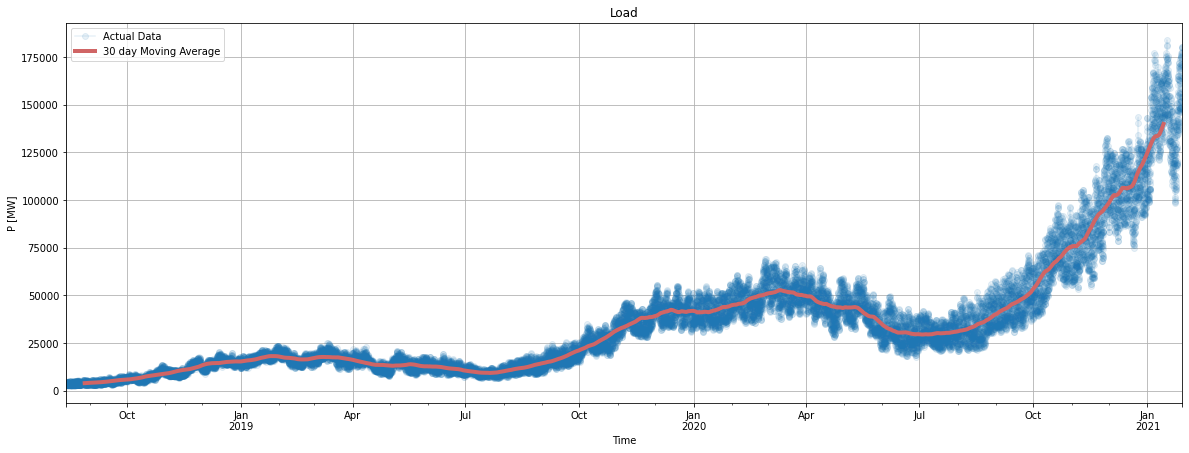

In [ ]:
ActualLoad.plot(figsize=[20,7], alpha=0.1, marker="o")
#ForecastedLoad.plot(figsize=[20,7], alpha=0.1, marker=".")
ActualLoad.rolling(window=30*24, center=True).mean().plot(ax=plt.gca(), color=red, lw=4);
#ActualLoad.rolling(window=7*24, center=True).mean().plot(ax=plt.gca(), color=green, lw=4);
#ForecastedLoad.rolling(window=30*24, center=True).mean().plot(ax=plt.gca(), color=green, lw=4);
plt.legend(["Actual Data", "30 day Moving Average"])
plt.grid()
plt.xticks(), plt.yticks();
plt.xlabel("Time"), plt.ylabel("P [MW]");
plt.title("Load");

In [ ]:
print(tempC.max())
np.argmax(tempC)

29.965547263681003


8341

In [ ]:
tempC.index[8341]

Timestamp('2019-07-26 14:00:00')

In [ ]:
print(tempC.min())
np.argmin(tempC)

-16.015891472868


4063

In [ ]:
tempC.index[4063]

Timestamp('2019-01-29 08:00:00')

**Demand Profile for Colder and Hotter Weeks**

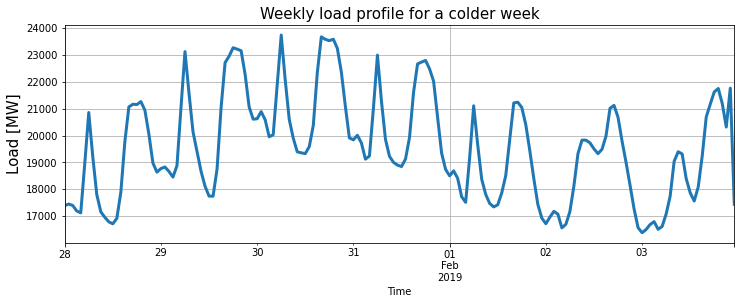

In [ ]:
ActualLoad["2019-1-28": "2019-2-3"].plot(figsize=[12, 4], lw=3);
plt.ylabel("Load [MW]", fontsize=15)
plt.title("Weekly load profile for a colder week", fontsize=15)
plt.xlabel("Time")
plt.grid()

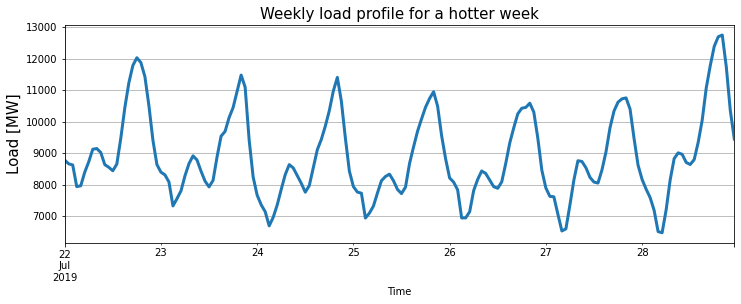

In [ ]:
ActualLoad["2019-7-22": "2019-7-28"].plot(figsize=[12, 4], lw=3);
plt.ylabel("Load [MW]", fontsize=15)
plt.title("Weekly load profile for a hotter week", fontsize=15)
plt.xlabel("Time")
plt.grid()

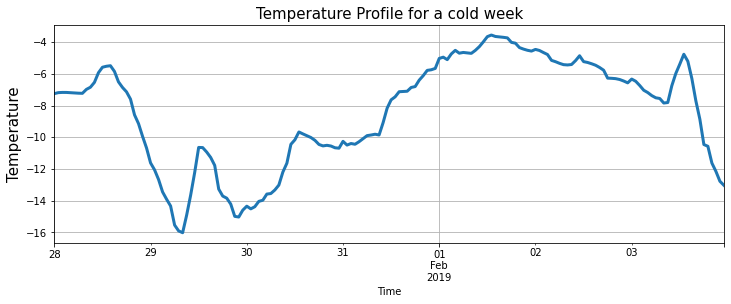

In [ ]:
tempC["2019-1-28": "2019-2-3"].plot(figsize=[12, 4], lw=3);
plt.ylabel("Temperature", fontsize=15)
plt.title("Temperature Profile for a cold week", fontsize=15)
plt.xlabel("Time")
plt.grid()

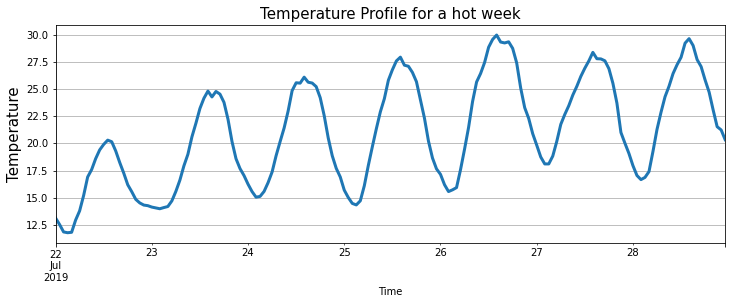

In [ ]:
tempC["2019-7-22": "2019-7-28"].plot(figsize=[12, 4], lw=3);
plt.ylabel("Temperature", fontsize=15)
plt.title("Temperature Profile for a hot week", fontsize=15)
plt.xlabel("Time")
plt.grid()

In [ ]:
def getSeason(ActualLoad):
  season=pd.Series()
  
  for year in ActualLoad.index.year.unique():

    yearlySeason = pd.Series("inter-season", index=ActualLoad.loc[str(year)].index)

    yearlySeason.loc[: "{}-2-27".format(year)] ="winter"
    yearlySeason.loc["{}-11-1".format(year):] = "winter"
    yearlySeason.loc["{}-5-1".format(year): "{}-9-30".format(year)]= "summer"

    season=pd.concat([season, yearlySeason])
  return season

In [ ]:
season= getSeason(ActualLoad).rename("season")
print(season)

2018-08-13 01:00:00    summer
2018-08-13 02:00:00    summer
2018-08-13 03:00:00    summer
2018-08-13 04:00:00    summer
2018-08-13 05:00:00    summer
                        ...  
2021-01-28 18:00:00    winter
2021-01-28 19:00:00    winter
2021-01-28 20:00:00    winter
2021-01-28 21:00:00    winter
2021-01-28 22:00:00    winter
Name: season, Length: 21598, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
def plot_daily(ActualLoad, seasonStr):
  xaxis= pd.date_range("2018-8-13", periods=24, freq="1h").strftime("%H:%M")
  fontsize = 15
  df= ActualLoad[season==seasonStr].to_frame()
  df= df.assign(day_name = df.index.day_name(), hour= df.index.strftime("%H:%M"))

  weekdayName= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

  (df.pivot_table("load", index="day_name", columns= "hour")
    .T
    .loc[: , weekdayName]
    .plot(figsize=[8,5],
          lw=3));

  plt.xticks(np.arange(0, len(xaxis), 2), xaxis[::2]);
  plt.xlabel("Hour", fontsize=fontsize)
  plt.ylabel("Load", fontsize=fontsize);
  plt.grid()
  plt.title("Mean Daily Profile- {}".format(seasonStr), fontsize=fontsize+5);
  plt.ylim(10,23)
  plt.autoscale()

In [ ]:
def plot_season(x,y, xlabel, ylabel, title, freq, s=30):
  df= pd.concat([x,y],axis=1)

  seasons=["winter", "inter-season", "summer"]
  colors= {"winter":blue, "inter-season":grey, "summer":red}

  fig= plt.figure(figsize=[17,5])
  size=12
  alpha=0.5

  for i,seasonStr in enumerate(seasons):

    fig.add_subplot(1, 3, i+1)
    df[season==seasonStr].resample(freq).mean().plot.scatter(ax=plt.gca(), 
                                                              x= x.name, y=y.name, s=s, alpha=alpha, color=colors[seasonStr]);

    plt.grid()
    plt.xlabel(xlabel, size=size)
    plt.ylabel(ylabel, size=size)
    plt.title("{} - {}".format(seasonStr.capitalize(),title), size=size);
    plt.xticks(size=size, rotation=45), plt.yticks(size=size);
    plt.autoscale()
  plt.tight_layout()

**Daily Load Profiles in Different Seasons**

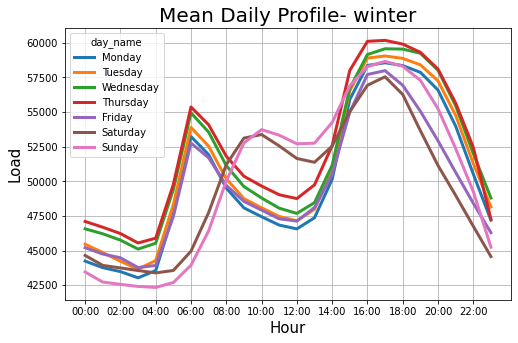

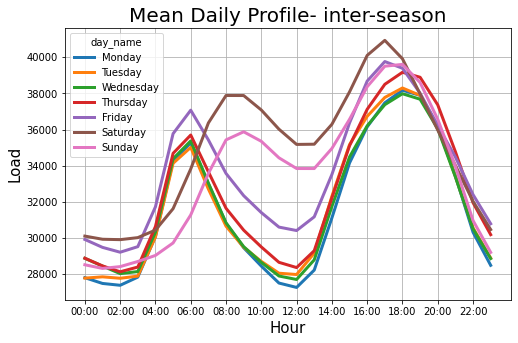

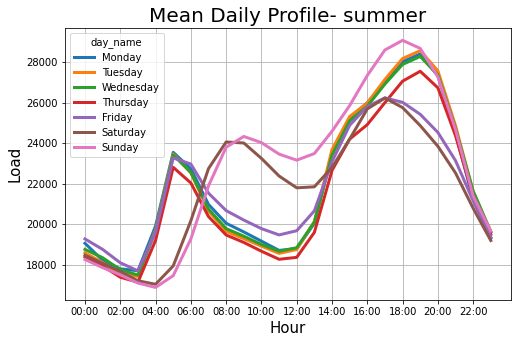

In [ ]:
plot_daily(ActualLoad, seasonStr="winter")
plot_daily(ActualLoad, seasonStr="inter-season")
plot_daily(ActualLoad, seasonStr="summer")

**Seasonal Variations**

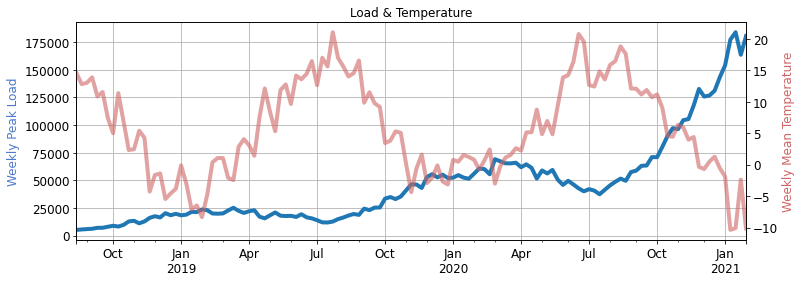

In [ ]:
fig, axes1 = plt. subplots(figsize=[12,4])
ActualLoad.resample("w").max().plot(ax=axes1, lw=4)
plt.xlabel("")
plt.ylabel("Weekly Peak Load", fontsize=12, color=blue);
plt.xticks(fontsize=12), plt.yticks(fontsize=12);
plt.grid()
plt.title("Load & Temperature")

axes2=axes1.twinx()
tempC.resample("W").mean().plot(ax=axes2, alpha=0.6, lw=4, color=red);
plt.yticks(fontsize=12);
plt.ylabel("Weekly Mean Temperature", fontsize=12, color=red);
plt.autoscale()

**Correlation Between Load & Temperature**

Poor Correlation at hourly resolution  but at daily resolution it doesnot create a double hockey stick as it does in the paper. Can't say anything about correlation here either.

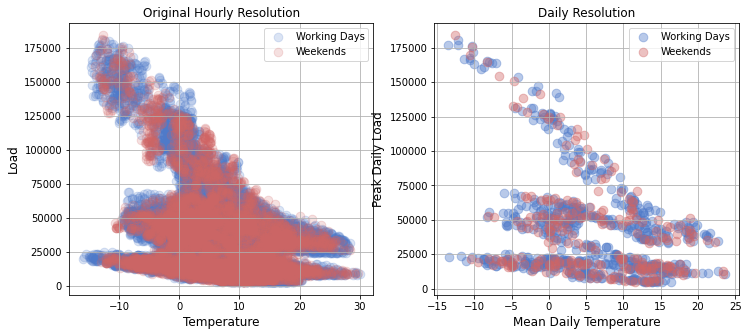

In [ ]:
s=75
fig= plt.figure(figsize=[12,5])

fig.add_subplot(1,2,1)
plt.scatter(x=tempC[ActualLoad.index.dayofweek < 5],
            y=ActualLoad[ActualLoad.index.dayofweek < 5],
            alpha=0.2, s=s, color=blue);
plt.scatter(x=tempC[ActualLoad.index.dayofweek >= 5],
            y=ActualLoad[ActualLoad.index.dayofweek >= 5],
            alpha=0.2, s=s, color=red);
plt.grid()
plt.xlabel("Temperature", fontsize=12),
plt.ylabel("Load", fontsize=12);
plt.legend(["Working Days", "Weekends"])
plt.title("Original Hourly Resolution");
plt.autoscale()

fig.add_subplot(1,2,2)
plt.scatter(x=tempC[ActualLoad.index.dayofweek < 5].resample("d").mean(),
            y=ActualLoad[ActualLoad.index.dayofweek < 5].resample("d").max(),
            alpha=0.4,
            s=s,
            color=blue);
plt.scatter(x=tempC[ActualLoad.index.dayofweek >= 5].resample("d").mean(),
            y=ActualLoad[ActualLoad.index.dayofweek >= 5].resample("d").max(),
            alpha=0.4,
            s=s,
            color=red);
plt.grid()
plt.xlabel("Mean Daily Temperature", fontsize=12),
plt.ylabel("Peak Daily Load", fontsize=12);
plt.legend(["Working Days", "Weekends"]);
plt.title("Daily Resolution");
plt.autoscale()

**Correlation b/w Daily Load & Temperature- by Season & Day Type**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


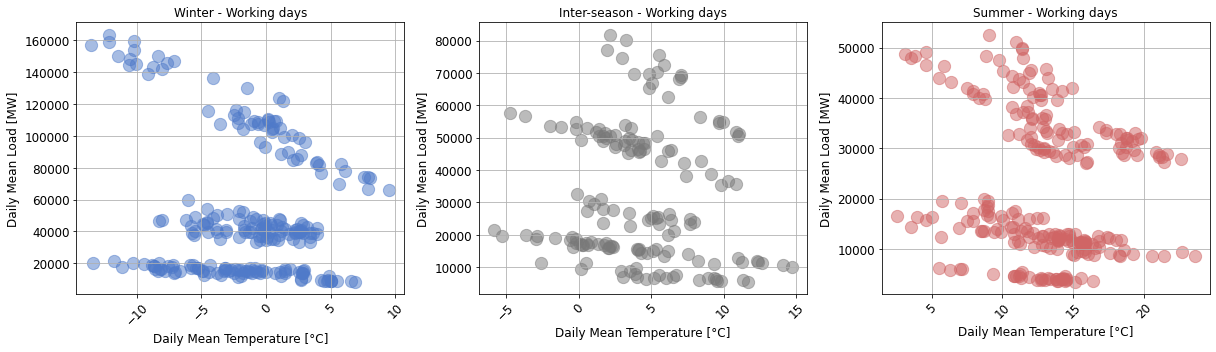

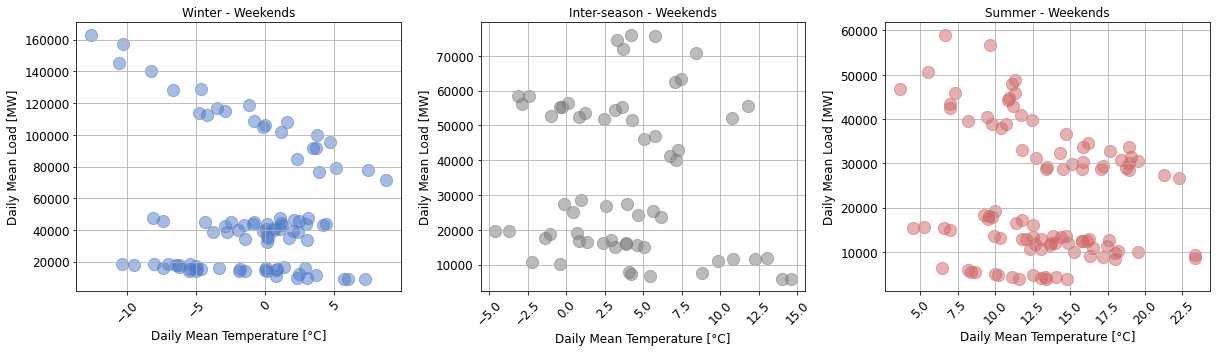

In [ ]:
plot_season(x=tempC.loc[ActualLoad.index.dayofweek < 5], 
             y=ActualLoad.loc[ActualLoad.index.dayofweek < 5], 
             xlabel="Daily Mean Temperature [°C]", 
             ylabel="Daily Mean Load [MW]", 
             title="Working days",
             freq="24h",
             s=150
             )

plot_season(x=tempC.loc[ActualLoad.index.dayofweek >= 5], 
             y=ActualLoad.loc[ActualLoad.index.dayofweek >= 5], 
             xlabel="Daily Mean Temperature [°C]", 
             ylabel="Daily Mean Load [MW]", 
             title="Weekends",
             freq="24h",
             s=150
             )

**Correlation between Hourly Load & Temperature- by Season, hour & Day Type**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


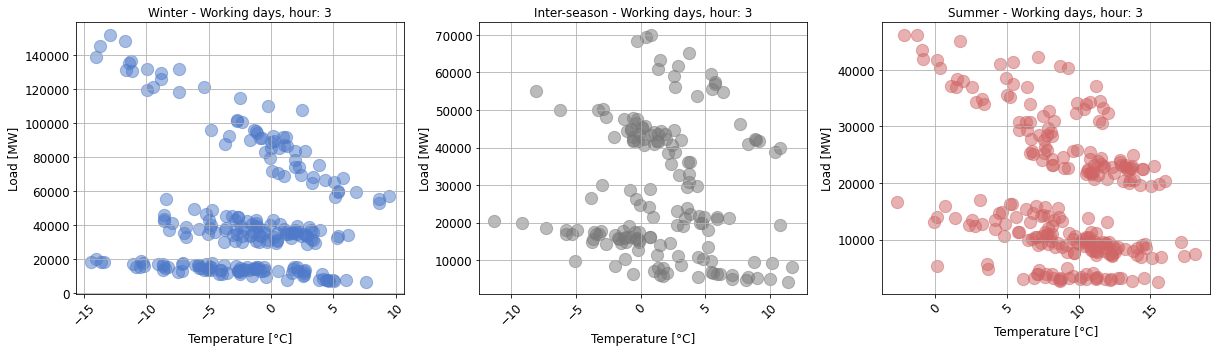

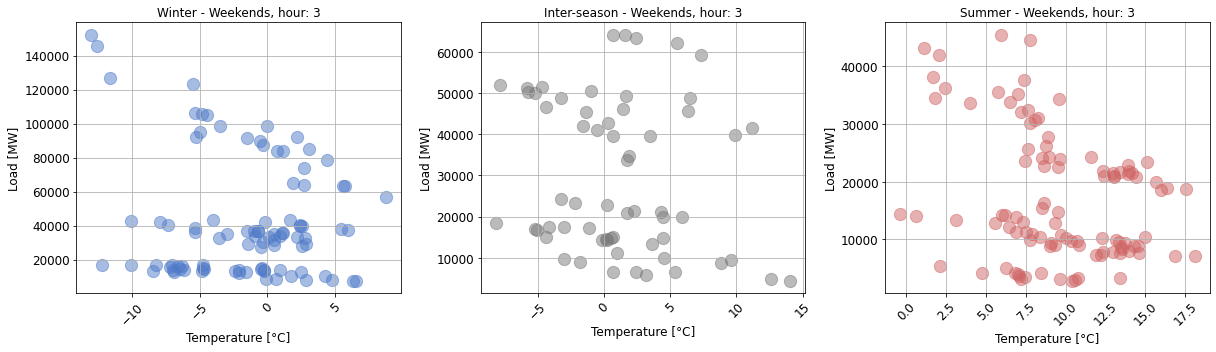

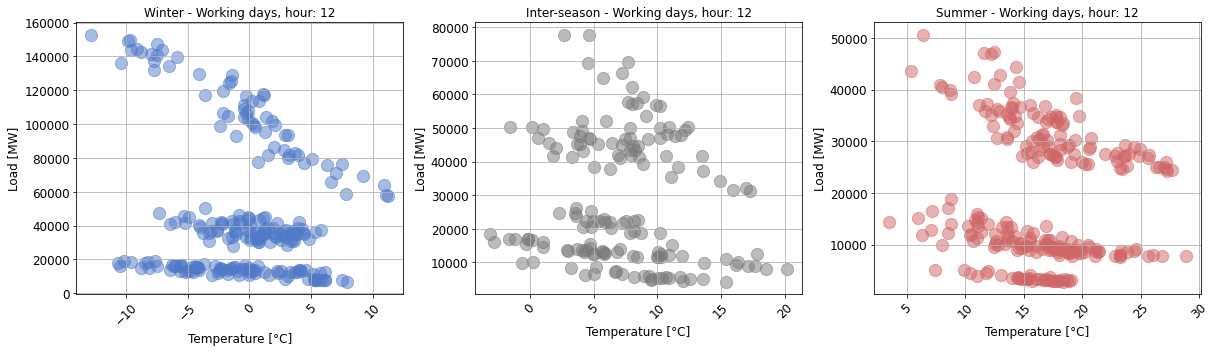

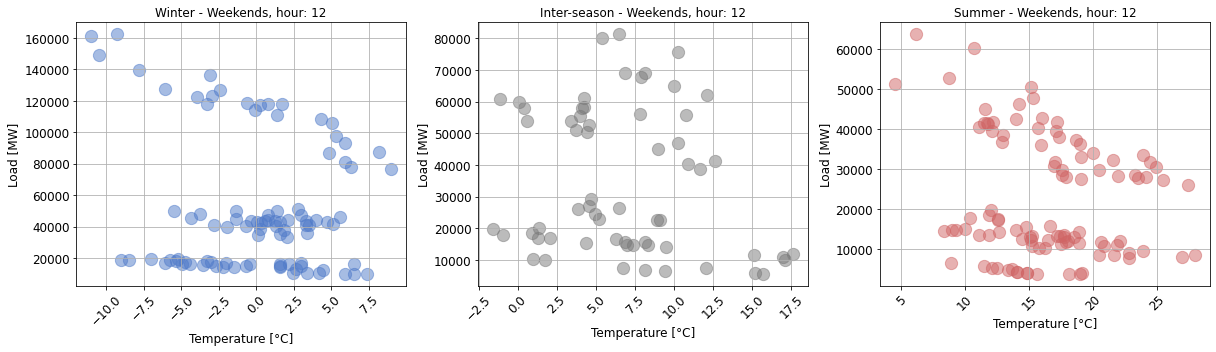

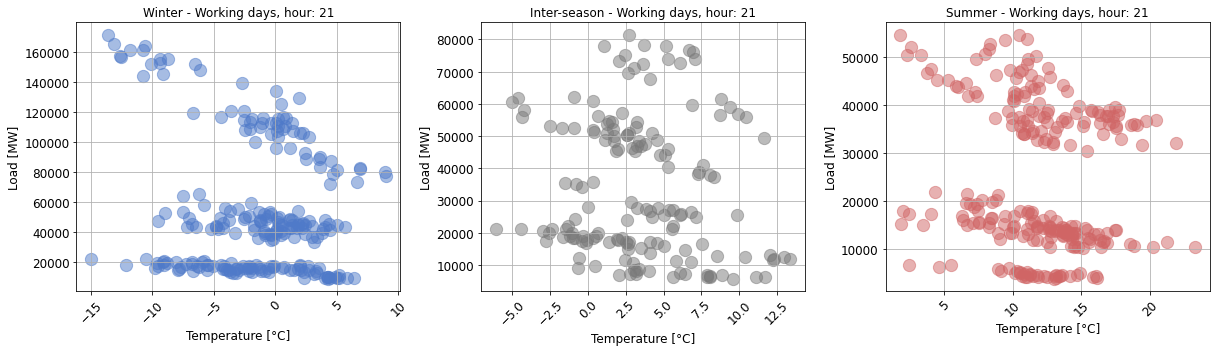

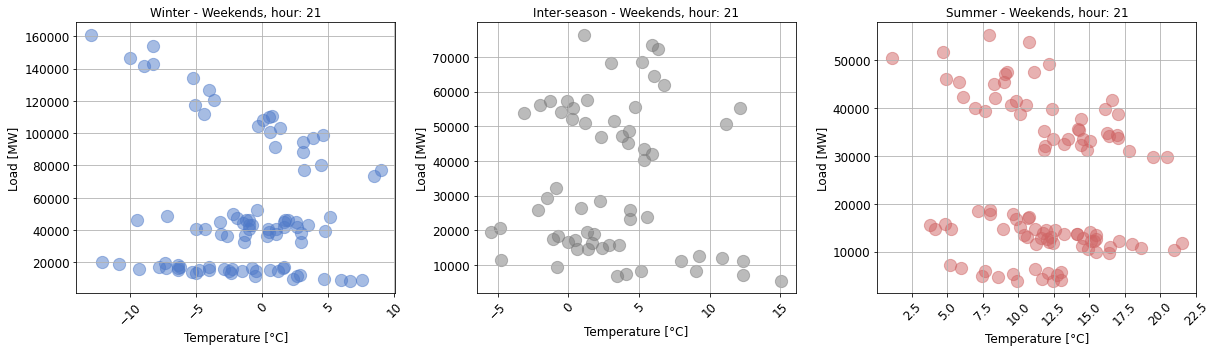

In [ ]:
for hour in [3, 12, 21]:
    
    plot_season(x=tempC.loc[(ActualLoad.index.dayofweek < 5) & (ActualLoad.index.hour == hour)], 
                 y=ActualLoad.loc[(ActualLoad.index.dayofweek < 5) & (ActualLoad.index.hour == hour)],
                 xlabel="Temperature [°C]", 
                 ylabel="Load [MW]", 
                 title="Working days, hour: {}".format(hour),
                 freq="1h",
                 s=150)

    plot_season(x=tempC.loc[(ActualLoad.index.dayofweek >= 5) & (ActualLoad.index.hour == hour)], 
                 y=ActualLoad.loc[(ActualLoad.index.dayofweek >= 5) & (ActualLoad.index.hour == hour)], 
                 xlabel="Temperature [°C]", 
                 ylabel="Load [MW]", 
                 title="Weekends, hour: {}".format(hour),  
                 freq="1h",
                 s=150)

In [ ]:
def get_interactions(s, dummies, poly_degree=1):
    if s.name == None: s.name = "_"
    s1 = dummies.apply(lambda x: x * s).rename("{}".format(s.name + "_{}").format, axis=1)
    s2 = (dummies.apply(lambda x: x * s) **2).rename("{}".format(s.name + "2_{}").format, axis=1)
    s3 = (dummies.apply(lambda x: x * s) **3).rename("{}".format(s.name + "3_{}").format, axis=1)
    
    if poly_degree == 1: s2, s3 = None, None
    if poly_degree == 2: s3 = None

    df = pd.concat([s1, s2, s3], axis=1)
    return df

def print_mape(y_true, y_pred):
    error = y_true - y_pred
    mape = (100 * error.abs() / y_true).mean()
    print("MAPE: {:.3f} %".format(mape))


In [ ]:
def get_season(ts_in):
    season = pd.Series()

    for year in ts_in.index.year.unique():

        # CREATE SEASONS
        yearly_season = pd.Series("inter-season", index=ts_in.loc[str(year)].index)

        yearly_season.loc[: "{}-2-15".format(year)] = "winter"
        yearly_season.loc["{}-11-15".format(year) :] = "winter"
        yearly_season.loc["{}-5-15".format(year) : "{}-9-15".format(year)] = "summer"

        season = pd.concat([season, yearly_season])
    return season


In [ ]:
y = ActualLoad.rename("y").copy()


In [ ]:
season = get_season(y).rename("season")
month = pd.Series(y.index.month.astype(str), index=y.index, name="month").apply(lambda x: "m{}".format(x))
day = pd.Series(y.index.dayofweek.astype(str), index=y.index, name="day").apply(lambda x: "d{}".format(x))
hour = pd.Series(y.index.strftime("%H:%M"), index=y.index, name="hour")
dayhour = (day + "_" + hour).rename("dayhour")

month_dummies = pd.get_dummies(month.sort_values()).sort_index()
day_dummies = pd.get_dummies(day.sort_values()).sort_index()
hour_dummies = pd.get_dummies(hour.sort_values()).sort_index()
dayhour_dummies = pd.get_dummies(dayhour.sort_values()).sort_index()

trend = pd.Series(np.arange(1, len(y) + 1), y.index, name="trend")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


**Features: Only Constant**

We want to minimize the Residual Sum of Squares (RSS). This means, that if we would search for a single value that would minimize RSS of  our model, that value would be a mean target value (in our case true load).

In [ ]:
X_arr = np.ones_like(y).reshape(-1, 1)
y_arr = y.values.reshape(-1, 1)
print("X dimensions: {}, y dimensions: {}".format(X_arr.shape, y_arr.shape))

mlr = LinearRegression(fit_intercept=False).fit(X_arr, y_arr)
np.unique(mlr.predict(X_arr))

X dimensions: (21598, 1), y dimensions: (21598, 1)


array([35010.68922127])

The value is equal to the mean.

In [ ]:
y.mean()


35010.689221270506

**Features: Hour of the Day**

Without dropping intercept and dummy variables.

In [ ]:
X_arr = hour_dummies.values
y_arr = y.values.reshape(-1, 1)
print("X dimensions: {}, y dimensions: {}".format(X_arr.shape, y_arr.shape))

mlr = LinearRegression(fit_intercept=False).fit(X_arr, y_arr)
y_pred = pd.Series(mlr.predict(X_arr).flatten(), index=y.index, name="y_pred")
y_pred_hour = y_pred.copy() 
print_mape(y, y_pred)

y_pred.head(2)

X dimensions: (21598, 24), y dimensions: (21598, 1)
MAPE: 129.348 %


timestamp
2018-08-13 01:00:00    30336.226874
2018-08-13 02:00:00    29972.534883
Name: y_pred, dtype: float64

In [ ]:
y_hourly_mean = pd.pivot_table(y.to_frame(), index=y.index.hour).y
y_pred_hourly_mean = pd.Series(y.index.hour, index=y.index, name="y_pred_hourly_mean").map(y_hourly_mean).sort_index()

In [ ]:
(y_pred - y_pred_hourly_mean).mean()


-4.698817335060211e-12

Since the model can not distinguish between different months, neither days this leads to the same daily predictions during the whole time.



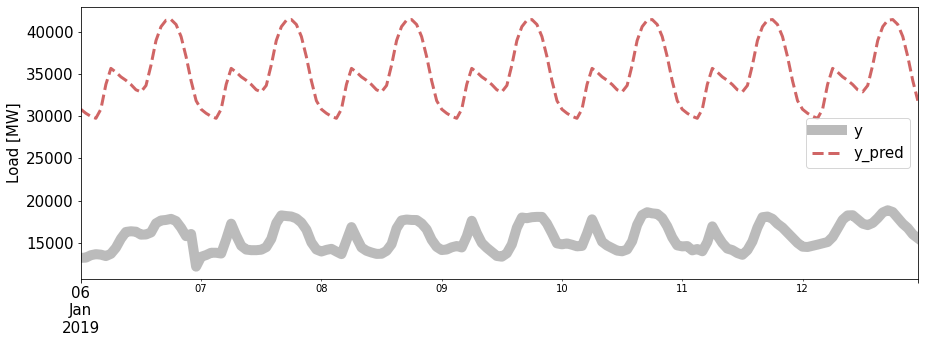

In [ ]:
indices = y["2019-1-6": "2019-1-12"].index

y.loc[indices].plot(figsize=[15, 5], lw=10, alpha=0.5, color=grey, legend=True);
y_pred.loc[indices].plot(lw=3, ls="--", color=red, legend=True);
plt.xticks(fontsize=15), plt.yticks(fontsize=15)
plt.xlabel(""), plt.ylabel("Load [MW]", fontsize=15);
plt.legend(fontsize=15);

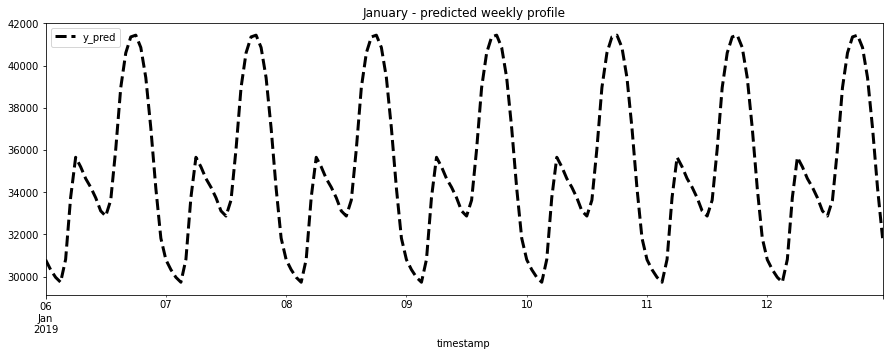

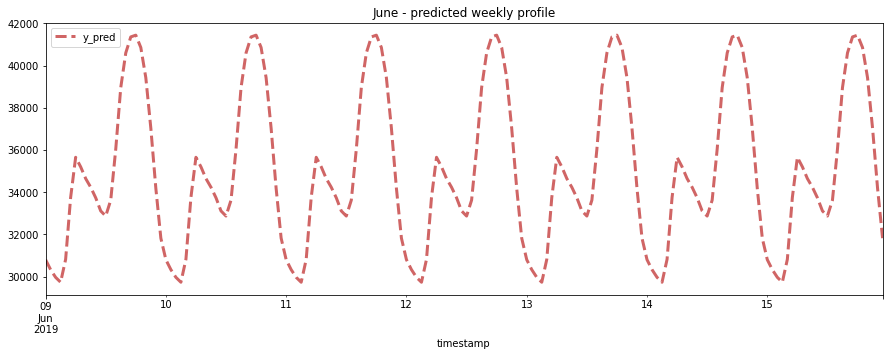

In [ ]:

indices_january = y["2019-1-6": "2019-1-12"].index
indices_june = y["2019-6-9": "2019-6-15"].index


fig = plt.figure(figsize=[15, 5])
y_pred_hour.loc[indices_january].plot(lw=3, ls="--", color="k", legend=True);
plt.title("January - predicted weekly profile")

fig = plt.figure(figsize=[15, 5])
y_pred_hour.loc[indices_june].plot(lw=3, ls="--", color=red, legend=True);
plt.title("June - predicted weekly profile");

**Features: Month + Day of the Week + Hour of the Day**

Dropping one dummy to avoid colinearity

In [ ]:
#exclude the last category
X = pd.concat([month_dummies.iloc[:, :-1],  
               day_dummies.iloc[:, :-1],   
               hour_dummies.iloc[:, :-1]    
              ], axis=1)
X_arr = X.values
y_arr = y.values.reshape(-1, 1)
print("X dimensions: {}, y dimensions: {}".format(X_arr.shape, y_arr.shape))

mlr = LinearRegression().fit(X_arr, y_arr)
y_pred = pd.Series(mlr.predict(X_arr).flatten(), index=y.index, name="y_pred")
y_pred_mdh = y_pred.copy() 
print_mape(y, y_pred)

y_pred.head(2)

X dimensions: (21598, 40), y dimensions: (21598, 1)
MAPE: 107.977 %


timestamp
2018-08-13 01:00:00    13849.801937
2018-08-13 02:00:00    13486.109946
Name: y_pred, dtype: float64

**Features: Month + Day of the Week x Hour of the Day**

In [ ]:
 # exclude the last category
X = pd.concat([month_dummies.iloc[:, :-1], 
               dayhour_dummies.iloc[:, :-1],    
              ], axis=1)
X_arr = X.values
y_arr = y.values.reshape(-1, 1)
print("X dimensions: {}, y dimensions: {}".format(X_arr.shape, y_arr.shape))

mlr = LinearRegression().fit(X_arr, y_arr)
y_pred = pd.Series(mlr.predict(X_arr).flatten(), index=y.index, name="y_pred")
y_pred_mdxh = y_pred.copy() 
print_mape(y, y_pred)

y_pred.head(2)

X dimensions: (21598, 178), y dimensions: (21598, 1)
MAPE: 107.624 %


timestamp
2018-08-13 01:00:00    13728.314308
2018-08-13 02:00:00    13432.701998
Name: y_pred, dtype: float64

In [ ]:
preds = pd.concat([y_pred_hour.rename("hour"),
                   y_pred_mdh.rename("month + day + hour"),
                   y_pred_mdxh.rename("month + day x hour")
                  ], axis=1)

**Comparing the 3 models**

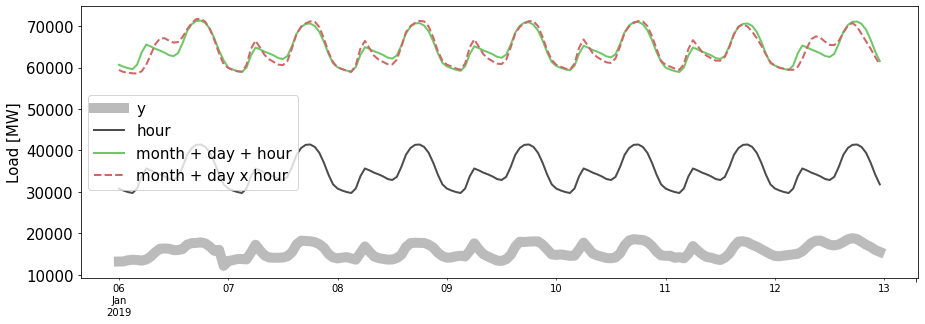

In [ ]:
indices = y["2019-1-6": "2019-1-12"].index

y.loc[indices].plot(figsize=[15, 5], lw=10, alpha=0.5, color=grey, legend=True);
preds.loc[indices, "hour"].plot(lw=2, ls="-", color="k", alpha=0.7, legend=True);
preds.loc[indices, "month + day + hour"].plot(lw=2, ls="-", color=green, legend=True);
preds.loc[indices, "month + day x hour"].plot(lw=2, ls="--", color=red, legend=True);
plt.xticks(fontsize=15), plt.yticks(fontsize=15)
plt.xlabel(""), plt.ylabel("Load [MW]", fontsize=15);
plt.legend(fontsize=15);
plt.autoscale()

**Create Artificial Dataset**

Adding noise:
 $y_{true}$ = $y_{pred}$ + $random\_gaussian\_noise$

In [ ]:
#create piece-wise quadratic function and add Gaussian noise
x_arr = np.arange(0, 4, 0.01).reshape(-1, 1)
y_arr = np.zeros_like(x_arr)

x = pd.Series(x_arr.flatten())

threshold = 2
np.random.seed(0)

actual_func_left = - 4 * x_arr[x_arr < threshold] + 1.5 * x_arr[x_arr < threshold] ** 2 
actual_func_right =  -x_arr[x_arr >= threshold] + 0.5 * x_arr[x_arr >= threshold] ** 2
actual_func = np.concatenate([actual_func_left, actual_func_right])

y_arr[x_arr < threshold] = actual_func_left + np.random.normal(scale=1, size=len(x_arr[x_arr < threshold]))
y_arr[x_arr >= threshold] = actual_func_right + np.random.normal(scale=1, size=len( x_arr[x_arr >= threshold]))

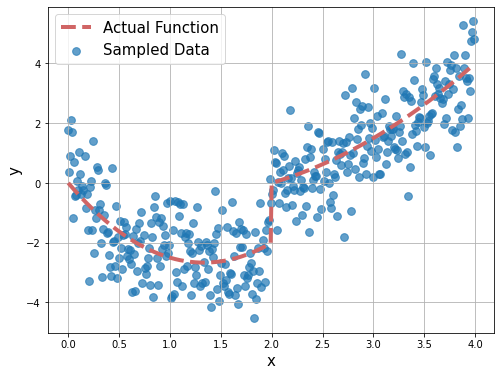

In [ ]:
fig = plt.figure(figsize=[8, 6], facecolor="w")
plt.scatter(x=x_arr, y=y_arr, s=60, alpha=0.7, label="Sampled Data");
plt.plot(x_arr, actual_func, ls="--", lw=4, color=red, label="Actual Function")
plt.grid(), plt.legend(fontsize=15);
plt.xlabel("x", fontsize=15), plt.ylabel("y", fontsize=15);

Correlation non linear- models fails to capture it.

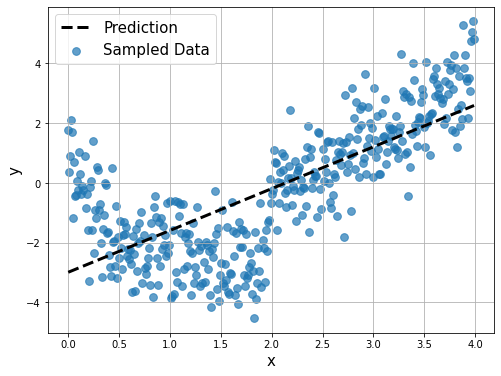

In [ ]:
X = pd.concat([x
              ], axis=1)
X_arr = X.values.reshape(-1, 1)

mlr = LinearRegression().fit(X_arr, y_arr)
y_pred = pd.Series(mlr.predict(X_arr).flatten(), index=x, name="prediction")

fig = plt.figure(figsize=[8, 6], facecolor="w")
plt.scatter(x=x_arr, y=y_arr, s=60, alpha=0.7, label="Sampled Data");
y_pred.plot(lw=3, ls="--", color="k", label="Prediction")
plt.grid(), plt.legend(fontsize=15)
plt.xlabel("x", fontsize=15), plt.ylabel("y", fontsize=15);


**Piecewise Linear Regression**

Segmenting numerical features into two features. These two features (x_left & x_right) are created from an original feature $x$, whereas one is defined only on a left side and another only on the right side of $x$-axis otherwise, it equals zero.



In [ ]:
x_left, x_right = x.rename("x_left").copy(), x.rename("x_right").copy()
x_left.loc[x > 2] = 0
x_right.loc[x <= 2] = 0

X = pd.concat([x_left, x_right, 
              ], axis=1)
X_arr = X.values

X.head()

,x_left,x_right
0,0.00,0.0
1,0.01,0.0
2,0.02,0.0
3,0.03,0.0
4,0.04,0.0


Model fits it much better.

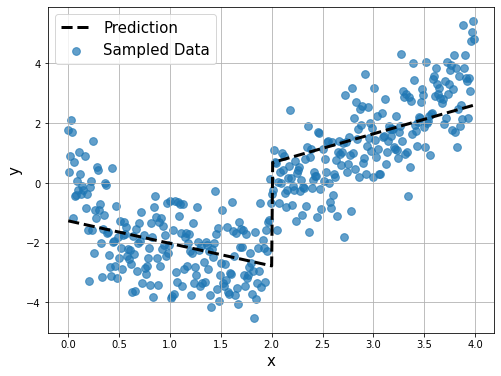

In [ ]:
mlr = LinearRegression().fit(X_arr, y_arr)
y_pred = pd.Series(mlr.predict(X_arr).flatten(), index=x, name="prediction")

fig = plt.figure(figsize=[8, 6], facecolor="w")
plt.scatter(x=x_arr, y=y_arr, s=60, alpha=0.7, label="Sampled Data");
y_pred.plot(lw=3, ls="--", color="k", label="Prediction")
plt.grid(), plt.legend(fontsize=15)
plt.xlabel("x", fontsize=15), plt.ylabel("y", fontsize=15);

**Adding a second degree polynomial**

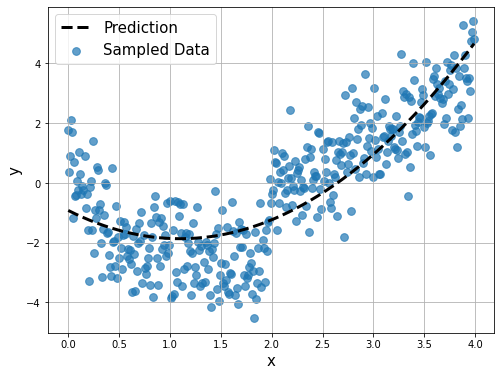

In [ ]:
X = pd.concat([x, x ** 2
              ], axis=1)
X_arr = X.values

mlr = LinearRegression().fit(X_arr, y_arr)
y_pred = pd.Series(mlr.predict(X_arr).flatten(), index=x, name="prediction")

fig = plt.figure(figsize=[8, 6], facecolor="w")
plt.scatter(x=x_arr, y=y_arr, s=60, alpha=0.7, label="Sampled Data");
y_pred.plot(lw=3, ls="--", color="k", label="Prediction")
plt.grid(), plt.legend(fontsize=15)
plt.xlabel("x", fontsize=15), plt.ylabel("y", fontsize=15);

**Adding a second degree polynomial with segmentation**

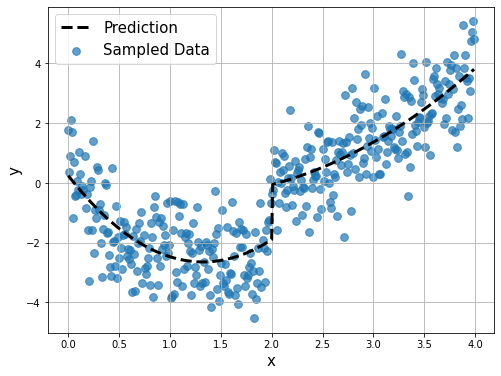

In [ ]:
x_left, x_right = x.rename("x_left").copy(), x.rename("x_right").copy()
x_left.loc[x > 2] = 0
x_right.loc[x <= 2] = 0


X = pd.concat([x_left, x_left ** 2, 
               x_right, x_right ** 2
              ], axis=1)
X_arr = X.values

mlr = LinearRegression().fit(X_arr, y_arr)
y_pred = pd.Series(mlr.predict(X_arr).flatten(), index=x, name="prediction")

fig = plt.figure(figsize=[8, 6], facecolor="w")
plt.scatter(x=x_arr, y=y_arr, s=60, alpha=0.7, label="Sampled Data");
y_pred.plot(lw=3, ls="--", color="k", label="Prediction")
plt.grid(), plt.legend(fontsize=15)
plt.xlabel("x", fontsize=15), plt.ylabel("y", fontsize=15);

**Modelling Temperature**

Features used is a 3rd Degree Polynomial because it can model assymteric depdendencies.


($temp$ x $month$ + $temp^{2}$ x $month$ + $temp^{3}$ x $month$) +
($temp$ x $hour$ + $temp^{2}$ x $hour$ + $temp^{3}$ x $hour$) +
($month$ + $day\_of\_the\_week$ x $hour\_of\_the\_day$)

In [ ]:
#exclude the last category
X = pd.concat([month_dummies.iloc[:, :-1],  
               dayhour_dummies.iloc[:, :-1],    
               # month interactions
               get_interactions(tempC, month_dummies, poly_degree=3),
               # hourly interactions
               get_interactions(tempC, hour_dummies, poly_degree=3)   
              ], axis=1)
X_arr = X.values
y_arr = y.values.reshape(-1, 1)
print("X dimensions: {}, y dimensions: {}".format(X_arr.shape, y_arr.shape))

mlr = LinearRegression().fit(X_arr, y_arr)
y_pred = pd.Series(mlr.predict(X_arr).flatten(), index=y.index, name="y_pred")
y_pred_mdxh = y_pred.copy()  
print_mape(y, y_pred)

y_pred.head(2)

X dimensions: (21598, 286), y dimensions: (21598, 1)
MAPE: 101.047 %


timestamp
2018-08-13 01:00:00    19004.16433
2018-08-13 02:00:00    20791.78933
Name: y_pred, dtype: float64

**Modelling Trends**

Adding a trend feature

In [ ]:
#exclude the last category
X = pd.concat([month_dummies.iloc[:, :-1],  
               dayhour_dummies.iloc[:, :-1],   
               
               get_interactions(tempC, month_dummies, poly_degree=3),  # month interactions
               get_interactions(tempC, hour_dummies, poly_degree=3),   # hourly interactions
               
               trend
              ], axis=1)
X_arr = X.values
y_arr = y.values.reshape(-1, 1)
print("X dimensions: {}, y dimensions: {}".format(X_arr.shape, y_arr.shape))

mlr = LinearRegression().fit(X_arr, y_arr)
y_pred = pd.Series(mlr.predict(X_arr).flatten(), index=y.index, name="y_pred")
y_pred_mdxh = y_pred.copy()  
print_mape(y, y_pred)

y_pred.head(2)

X dimensions: (21598, 287), y dimensions: (21598, 1)
MAPE: 52.862 %


timestamp
2018-08-13 01:00:00   -17434.623709
2018-08-13 02:00:00   -17501.565178
Name: y_pred, dtype: float64